<center><h1> Projeto 2 - Ciência dos Dados</h1><center>

## Insper Instituto de Ensino e Pesquisa

<h4>Autores:</h4>  
<ul>
    <li>Thiago Teixeira dos Santos</li>
    <li>Enzo Luidge Peixoto da Silva Bozelli</li>
    <li>Rafael Melhado Araujo Lima</li>
    <li>Caio Ribeiro de Paula</li>
 </ul>

<h4>Professores:</h4>  
<ul>
    <li>Maria Kelly Venezuela</li>
    <li>Fillipe Manoel Xavier Resina</li>
</ul>

<center><h1>Análise de Reincidência de Câncer de Mama</h1></center>

<center><img src="behind_breastcancer.jpg" width=700 style="float: center; margin: 0px 0px 10px 10px"></center>

___

### Importando bibliotecas necessárias:

In [102]:
import sys
!{sys.executable} -m pip install graphviz;
!{sys.executable} -m pip install pydotplus;
!{sys.executable} -m pip install category_encoders;

import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split 
from sklearn import metrics

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

import category_encoders as ce

import os

import matplotlib.pyplot as plt
import seaborn as sn

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

---

## I. Introdução

O câncer de mama, segundo o Instituto Nacional do Câncer (INCA), é tumor mais frequente entre mulheres, e o que apresenta a maior letalidade. Estágios graves, porém, podem ser prevenidos através de tratamento, sendo eficazes em até 95% das vezes e tornando evidente a importância de se realizar exames preventivos e em estágios iniciais para o devido tratamento da doença.

Tendo isso em mente, nosso projeto buscará prever, a partir de um diagnóstico de uma paciente com câncer de mama, se o caso em questão se trata ou não de uma reincidência da doença. Com essa previsão, poderá ser estimado qual o diagnóstico usual de pacientes com recorrência de câncer e usá-lo como base para os diagnósticos preventivos, além de indicar quais pacientes podem necessitar de atenção especial após seu tratamento, caso seu diagnóstico acuse uma possível reincidência.

---

## II. Base de dados

A base de dados contendo o diagnóstico das pacientes foi adquirida no site Kaggle, estando publicamente disponível na seguinte url: https://www.kaggle.com/devraikwar/breast-cancer-diagnostic

In [119]:
# Carregando os dados
dados = pd.read_csv('breast_cancer_diagnosis.csv')
dados.head()

,Start Age,End Age,menopause,Start tumor size,End tumor size,Start_env_nodes,end_env_nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40,49,premeno,15,19,0,2,yes,3,right,left_up,no,recurrence-events
1,50,59,ge40,15,19,0,2,no,1,right,central,no,no-recurrence-events
2,50,59,ge40,35,39,0,2,no,2,left,left_low,no,recurrence-events
3,40,49,premeno,35,39,0,2,yes,3,right,left_low,yes,no-recurrence-events
4,40,49,premeno,30,34,3,5,yes,2,left,right_up,no,recurrence-events


In [120]:
dados.shape

(286, 13)

#### Checando valores nulos

In [121]:
dados.isnull().sum().sum()

9

In [122]:
# Como o numero de NaNs é relavtivamente baixo quando comparados ao tamanho da database, podemos exluí-las sem maiores perdas
dados = dados.dropna()

#### Melhorando a base de dados

In [123]:
# Juntando colunas categóricas separadas
dados['age_group'] = dados['Start Age'].astype('string') + '-' + dados['End Age'].astype('string')
dados['env_nodes_group'] = dados['Start_env_nodes'].astype('string') + '-' + dados['end_env_nodes'].astype('string')
dados['tumor_size'] = dados['Start tumor size'].astype('string') + '-' + dados['End tumor size'].astype('string')

# Deletando colunas que não serão utilizadas, já que seu conteúdo foi adicionado a outra coluna
del dados['End Age']
del dados['Start Age']
del dados['Start_env_nodes']
del dados['end_env_nodes']
del dados['Start tumor size']
del dados['End tumor size']

# Atribuindo à variável target a coluna class
target = dados.pop('Class')
dados.insert(9,'Class',target)

# Renomeando a coluna class
dados.rename(columns = {'Class':'recurrent_events'}, inplace=True)

dados.head()

,menopause,node-caps,deg-malig,breast,breast-quad,irradiat,age_group,env_nodes_group,tumor_size,recurrent_events
0,premeno,yes,3,right,left_up,no,40-49,0-2,15-19,recurrence-events
1,ge40,no,1,right,central,no,50-59,0-2,15-19,no-recurrence-events
2,ge40,no,2,left,left_low,no,50-59,0-2,35-39,recurrence-events
3,premeno,yes,3,right,left_low,yes,40-49,0-2,35-39,no-recurrence-events
4,premeno,yes,2,left,right_up,no,40-49,3-5,30-34,recurrence-events


Com a visualização da base de dados melhorada, a legenda para cada coluna é:

- `menopause`: momento de menopausa da paciente.
- `node-caps`: presença do tumor nos gânglios linfáticos ou não.
- `deg-malig`: grau histológico de malignidade.
- `breast`: mama afetada.
- `breast-quad`: admitindo o mamilo como ponto central, o quartil do peito com região afetada.
- `irradiat`: paciente foi submetida a radioterapia ou não.
- `age_group`: faixa de idade.
- `env_nodes_group`: faixa do número de gânglios linfáticos auxiliares apresentando tumor.
- `tumor-size`: faixa do tamanho do tumor, em mm.
- `recurrent_events`: variável target — classificação se a paciente apresenta ou não reicidência de câncer.

---

## III. Análise exploratória

Vamos explorar a relação entre as variáveis features com a variável target.

Como todas as variáveis são categóricas, iremos utilizar tabelas cruzadas.

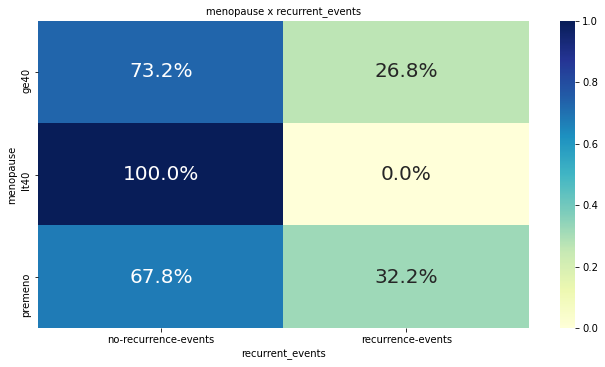

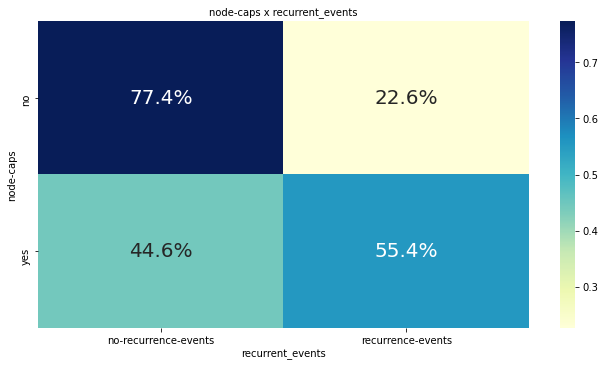

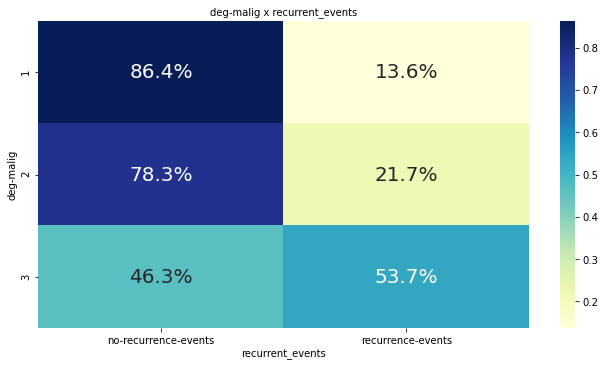

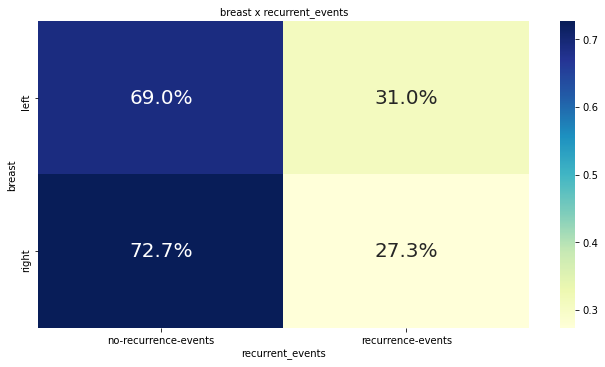

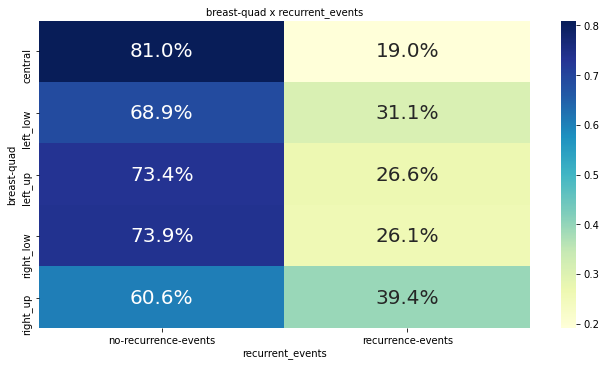

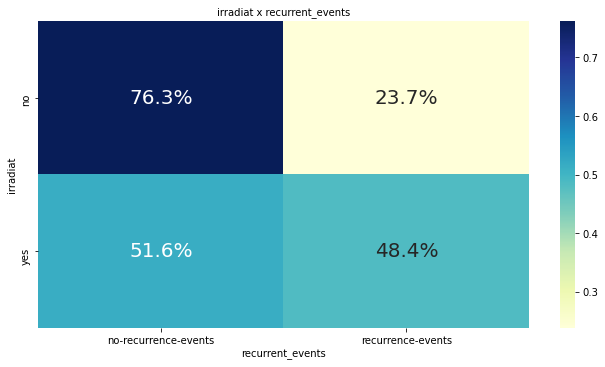

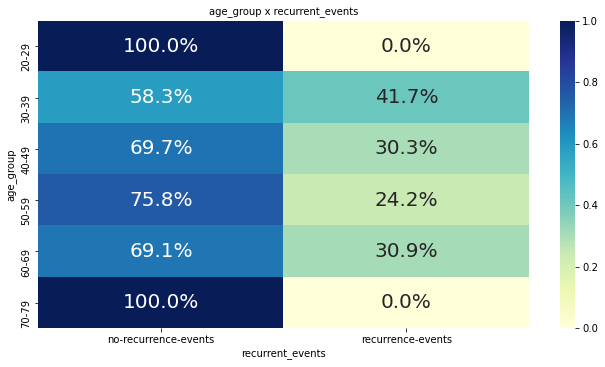

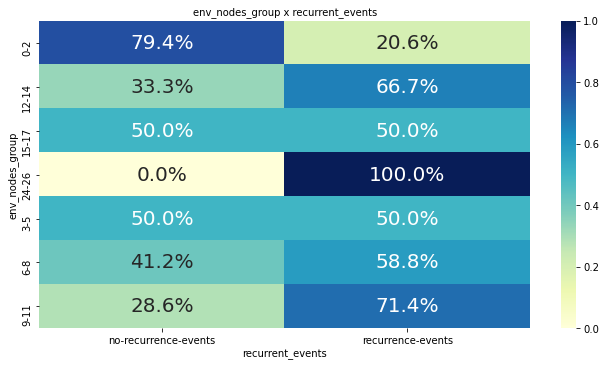

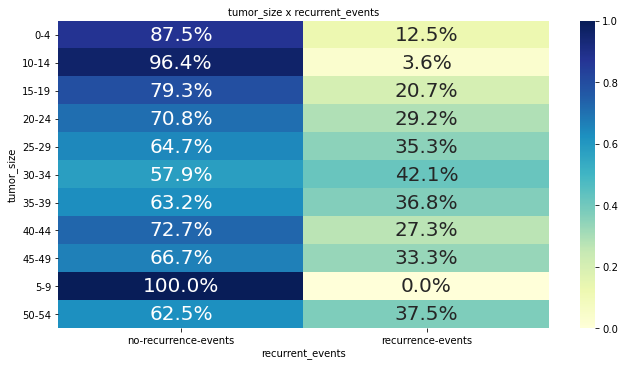

In [124]:
# Definindo features
features = ['menopause','node-caps','deg-malig','breast', 'breast-quad', 'irradiat','age_group','env_nodes_group','tumor_size']

# Heatmaps ou matrizes de confusão que relacionam a target com as features
for i, feature in enumerate(features):
    plt.figure(figsize = (11,60))
    plt.subplot(9,1,i+1)
    df_cm=pd.crosstab(dados[feature],dados['recurrent_events'],normalize='index')
    plt.title(f'{features[i]} x recurrent_events',fontdict={'fontsize': 10})
    sn.heatmap(df_cm, annot=True, annot_kws={"size":20},fmt='.1%',cmap='YlGnBu')
    if i == 8:
        break

##### **Insights** 

As variáveis `tumor-size` e `deg-malig` aparentam apresentar um padrão entre a distribuição de pacientes sem e com recorrência de eventos:

- Quanto maior a classificação do `deg-malig`, maior a porcentagem de pacientes com recorrência de eventos para essa característica
- Para valores mais centrais do `tumor-size`, maior a porcentagem de pacientes com recorrência de eventos para essa característica


---

## IV. Modelo de classificação Decision Tree

Como uma tentativa de prever a variável target, será utilizado o modelo Decision Tree.

A função "Decision Tree Classifier" é um método de aprendizado usado para classificação e regressão. 
O objetivo é criar um modelo que prediz o valor de uma variável-alvo pelo aprendizado de regras de decisão simples, referidas como "data features". 
Uma árvore pode ser vista como uma aproximação constante por partes.

##### Algumas vantagens de utilizar Decision Trees são:

- Fácil de entender e de interpretar, árvores podem ser visualizadas.

- Capaz de lidar com dados categóricos e numéricos, apesar da implementação sciki-tlearn ainda não suportar variáveis categóricas.

- Utiliza um modelo de caixa branca. Se uma situação dada é observável em um modelo, a explicação para a condição é facilmente explicada pela lógica booleana. Por contraste, num modelo de caixa preta (como a uma rede neural artificial) os resultados podem ser mais difíceis de interpretar.

- Possibilidade de validar o modelo utilizando testes estatísticos. Isso torna possível contabilizar a confiabilidade do modelo.

##### Algumas desvantagens das Decision Trees:

- Decision Tree learners podem criar árvores extremamente complicadas que não generalizam os dados muito bem.

- Predições das árvores de decisão não são suaves nem contínuas, mas feitas por aproximações constantes por partes.

- Decision Trees podem ser instáveis pois pequenas variações nos dados podem resultar na geração de uma árvore completamente diferente. 

#### a) Definindo parâmetros e codificando variáveis categóricas nominais

In [125]:
# Definindo os dummies para as variaveis categoricas nominais:
dummies = pd.get_dummies(dados['breast-quad'])
dummies_breast = pd.get_dummies(dados['breast'], prefix='breast')
dados = dados.join(dummies)
dados = dados.join(dummies_breast)

# Definindo as features e separando a base de dados entre treinamento e teste
features = ['menopause','node-caps','deg-malig','irradiat','age_group','env_nodes_group','tumor_size','central','left_low','left_up','right_low','right_up', 'breast_right', 'breast_left']
X = dados[features]
y = dados.recurrent_events

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% treinamento e 30% teste

dados.head()

,menopause,node-caps,deg-malig,breast,breast-quad,irradiat,age_group,env_nodes_group,tumor_size,recurrent_events,central,left_low,left_up,right_low,right_up,breast_left,breast_right
0,premeno,yes,3,right,left_up,no,40-49,0-2,15-19,recurrence-events,0,0,1,0,0,0,1
1,ge40,no,1,right,central,no,50-59,0-2,15-19,no-recurrence-events,1,0,0,0,0,0,1
2,ge40,no,2,left,left_low,no,50-59,0-2,35-39,recurrence-events,0,1,0,0,0,1,0
3,premeno,yes,3,right,left_low,yes,40-49,0-2,35-39,no-recurrence-events,0,1,0,0,0,0,1
4,premeno,yes,2,left,right_up,no,40-49,3-5,30-34,recurrence-events,0,0,0,0,1,1,0


#### b) Codificando variáveis categóricas ordinais

In [126]:
# Definindo o codificador
encoder = ce.OrdinalEncoder(cols=['menopause','node-caps','deg-malig','irradiat','age_group','env_nodes_group','tumor_size'])

# Codificando X_train e X_test
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train.head()

,menopause,node-caps,deg-malig,irradiat,age_group,env_nodes_group,tumor_size,central,left_low,left_up,right_low,right_up,breast_right,breast_left
195,1,1,1,1,1,1,1,1,0,0,0,0,1,0
99,1,1,2,1,2,2,2,0,0,1,0,0,1,0
113,1,1,3,2,1,1,3,0,0,0,0,1,1,0
72,2,1,2,1,3,2,4,0,1,0,0,0,1,0
197,3,1,2,1,3,2,5,0,1,0,0,0,0,1


#### c) Aplicando o modelo

In [127]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

#### d) Explorando resultados

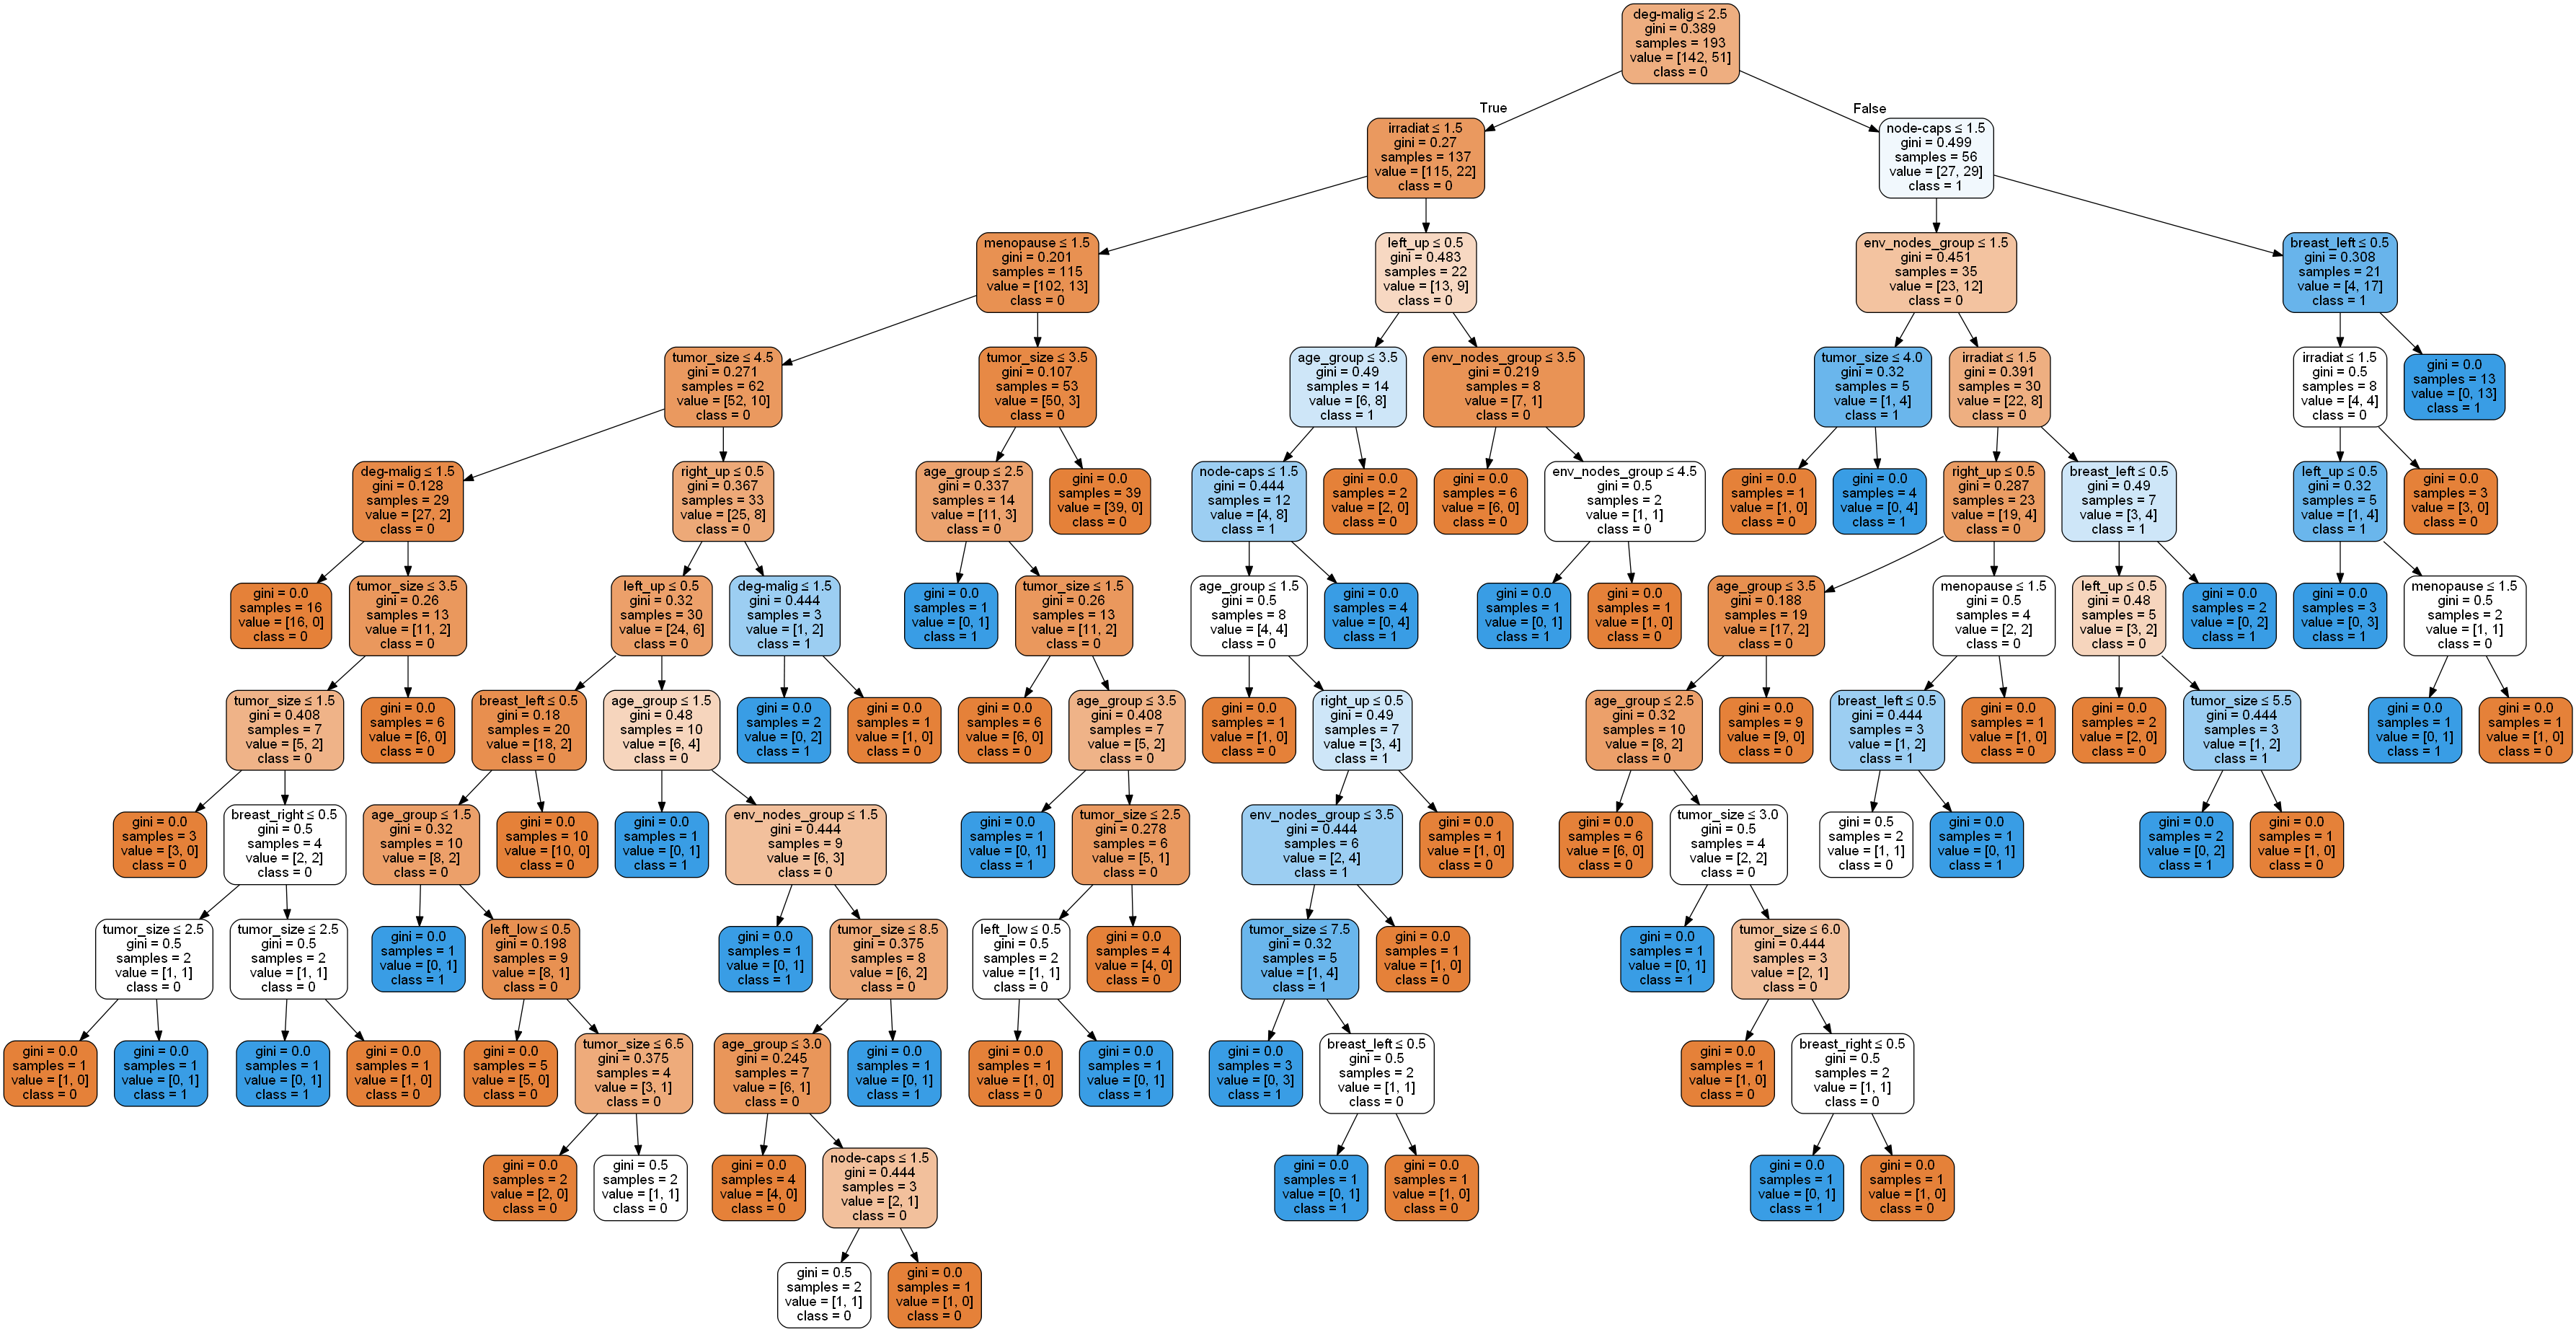

In [128]:
# Gerando a imagem da Decision Tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Cancer.png')
Image(graph.create_png())

**Matriz de confusão:**

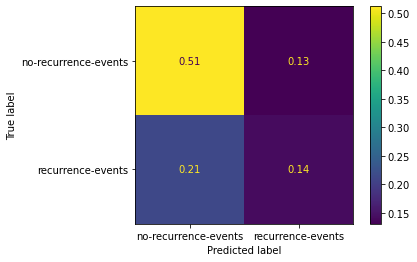

In [129]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test, normalize='all')  
plt.show()

In [130]:
# Relatório do Scikit Learn
print(metrics.classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

no-recurrence-events       0.70      0.80      0.75        54
   recurrence-events       0.52      0.40      0.45        30

            accuracy                           0.65        84
           macro avg       0.61      0.60      0.60        84
        weighted avg       0.64      0.65      0.64        84



O modelo conta com uma precisão acima de 50%. Cerca de 65% das vezes, o modelo acerta a categoria verdadeira, mas apenas isso não é suficiente para avaliar a performance do modelo.

Na situação do câncer de mama, os erros de classificação tem pesos diferentes: é melhor um diagnóstico apontar chance de reincidência de tumor quando não há do que o contrário. Para falsos positivos, uma atenção especial seria dada à paciente durante seu tratamento, mas um falso negativo daria uma falsa segurança.

Com esse insight em mente, um score importante a ser considerado é o recall, que mede a habilidade do modelo de encontrar todos os verdadeiros positivos ao dividir o número de verdadeiros pela soma do número de verdadeiros positivos com o número falsos negativos, como na equação a seguir:

`Recall = vp ÷ (vp + fn)`

É possível concluir, portanto, que o modelo não seria adequado para uso em uma situação real, uma vez que o Recall para a categoria recurrence-events, que indica chances de reincidência do tumor, é baixo. Ou seja, **o modelo encontra apenas cerca de 40% dos diagnósticos que tem chance de reicidência de câncer**, menos da metade.

---

## V. Modelo de classificação Random Forest Classifier

Como outra tentativa de prever a variável target, também será utilizado o modelo Random Forest Classifier.

Random Forests, ou Random Decision Forests, são um conjunto de métodos de aprendizado para classificação, regressão e outras tarefas que operam pela construção de uma multidão de Decision Trees no tempo de treinamento. Para tarefas de classifcação, o output da Random Forest é a classe selecionada pela maioria das árvores. Para tarefas de regressão, o retorno é a média prediziada pelas árvores individuais. Então, como o próprio nome sugere, as Random Forests são uma técnica de Bagging, de forma que todos os cálculos são executados em paralelo e não há interação entre as árvores de decisão ao construí-las.

##### Algumas vantagens de utilizar Random Forests são:
- Aprimoram modelos que estão sob efeito de underfitting ou overfitting justamente por utilizar de várias árvores de decisão independentes, sendo um modelo de alta precisão e consistência.
- Podem ser usadas tanto para problemas de regressão quanto para classificação.
- Limita a principal desvantagem de um modelo de árvore de decisão por randomizar os subconjuntos e recursos. Isso ajuda a focar nos padrões gerais dos dados de treinamento, reduzindo a sensibilidade ao ruído.

##### Algumas desvantagens das Random Forests:
- Gerar uma predição pode ser lento, dependendo do problema, uma vez que cada árvore precisa fazer sua decisão e depois fazer uma votação para o resultado final.
- Seu resultado é mais complexo de ser interpretado do que das Decision Trees, em que se pode fazer uma decisão ao seguir a árvore, apesar de ambos os modelos serem de muito práticos.
- Random Forests não são capazes de extrapolar com base nos dados, sendo inviável seu uso para descobrir tendências que fossem além dos valores do conjunto de treinamento.

Mesmo com as Random Forests usando muitas unidades e que são aleatórias para seu treinamento, ainda há dúvidas se, de fato, elas produzem um sobreajuste durante a classificação ou não. O que se observa é que, empiricamente, ela tende a produzir overfitting quando comparada a resultados teóricos.

#### a) Aplicando o modelo

Não é necessário definir os parâmetros ou codificar as variáveis pois será usado os mesmos parâmetros do modelo anterior

In [131]:
from sklearn.ensemble import RandomForestClassifier

# Montando uma Random Forest com 100 Decision Trees
clf=RandomForestClassifier(n_estimators=100)

# Estabelecendo os parâmetros no modelo
clf.fit(X_train,y_train)

# Treinando o modelo
y_pred=clf.predict(X_test)

#### b) Explorando resultados

**Scores de relevância das features:**

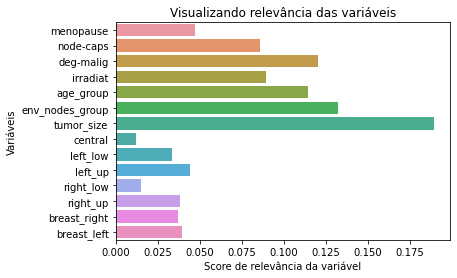

In [132]:
%matplotlib inline

# Com base nos resultados do modelo, adquirindo a relevância de cada variável
feature_import =(clf.feature_importances_)

# Criando o eixo x
sn.barplot(x=feature_import, y=features)

# Add labels to your graph
plt.xlabel('Score de relevância da variável')
plt.ylabel('Variáveis')
plt.title("Visualizando relevância das variáveis")
plt.show()

Dessa maneira, o gráfico também relembra que duas das features que apresentaram a maior relevância, `tumor-size` e `deg-malig`, são as mesmas que apresentaram um comportamento interessante a partir da análise dos heatmaps feita anteriormente. 

**Matriz de confusão:**

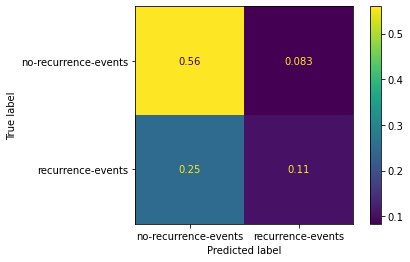

In [133]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test, normalize='all')  
plt.show()

In [134]:
# Relatório do Scikit Learn
print(metrics.classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

no-recurrence-events       0.69      0.87      0.77        54
   recurrence-events       0.56      0.30      0.39        30

            accuracy                           0.67        84
           macro avg       0.63      0.59      0.58        84
        weighted avg       0.65      0.67      0.64        84



A acurácia desse modelo é consideravemente alta, onde cerca de 67% das vezes o modelo acerta a classificação.

Analisando o Recall da classe recurrence-events, porém, fica evidente como sua performance ainda não é suficientemente adequada, uma vez que **o modelo encontra apenas cerca de 30% dos diagnósticos que acusam recorrência de câncer.**

---

## VI. Conclusões

Comparando a performance do Decision Tree com o Random Forest Classifier dentro do problema em questão, a acurácia dos dois modelos difere bastante. Como o esperado, a acurácia do Random Forest Classifier (cerca de 0.67) é maior do que a do Decision Tree (cerca de 0.65), uma vez que o modelo leva em consideração um conjunto de árvores para ser montado.

Contudo, por mais que sua taxa de acertos aumente, a sua habilidade de encontrar todos os diagnósticos que acusam reicidência de câncer (dada pelo Recall) diminui consideravelmente. Enquanto o modelo de árvore encontrava cerca de 37% desse tipo de diagnóstico, o modelo de floresta encontra apenas 27%. Como é de extrema importância encontrar todos os casos de reicidência, é possível concluir que **o modelo mais adequado para esse problema**, com essa base de dados, **é o Decision Tree**.

Dentre as possíveis causas para essa situação, onde a taxa de acertos aumenta, mas a recall diminui, pode-se apontar o fato de que a base de dados é desigual para as duas classes, onde 70% não tem reicidência e 30% tem. Como o Random Forest faz uma média de diversas Decision Trees, é possível que o modelo esteja impactado negativamente por essa desigualdade da base de dados original. Para uma melhor previsão com o Random Forest, portanto, uma medida que poderia ser tomada seria adotar uma base dados com 50% `recurrence-events` e 50% `no-recurrence-events`.

---

## VII. Referências Bibliográficas

- CHAURASIA, Vikas; PAL, Saurabh. Data mining techniques: to predict and resolve breast cancer survivability. International Journal of Computer Science and Mobile Computing IJCSMC, v. 3, n. 1, p. 10-22, 2014.

- INCA. Câncer de mama, conceito e magnitude. Disponível em: https://www.inca.gov.br/controle-do-cancer-de-mama/conceito-e-magnitude. Acessado em 26/11/2021

- SCIKIT LEARN. Decision Trees. Disponível em: https://scikit-learn.org/stable/modules/tree.html#tree. Acessado em 28/11/2021

- DATACAMP. Understanding Random Forests Classifiers in Python. Disponível em: https://www.datacamp.com/community/tutorials/random-forests-classifier-python. Acessado em: 30/11/2021

- https://datascience.stackexchange.com/questions/1028/do-random-forest-overfit. Acessado em 30/11/2021.
 
- LYASHENKO, Vladimir. How to use random forest for regression: notebook, examples and documentation. Disponível em: https://cnvrg.io/random-forest-regression/?gclid=Cj0KCQiAtJeNBhCVARIsANJUJ2GY1VTPXs5h7tWtFD9OJmDbd9fePRfFDZ1mfopVn7zDE5n4U0ho_lwaAmTNEALw_wcB. Acessado em 30/11/2021.